In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_kddcup99
import numpy as np

# Import 10% of the entire kddcup99 dataset
kdd99_data = fetch_kddcup99()
X = kdd99_data['data']
y = kdd99_data['target']

print(X.shape)
print(y.shape)

(494021, 41)
(494021,)


In [2]:
# Remove categorical data from X
X_num_sample = np.delete(X,[1,2,3],1)
print(X_num_sample.shape)
print(y.shape)

print(X[0:100])

(494021, 38)
(494021,)
[[0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 ...
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]
 [0 b'tcp' b'http' ... 0.0 0.0 0.0]]


In [3]:
# Assign each attack type to a numerical representation of an attack category

for i in range(X.shape[0]):
  
    if(y[i]==b'normal.'):
        y[i] = 1
    
# dos
    if(y[i]==b'neptune.'or y[i]==b'smurf.'or y[i]==b'pod.' or y[i]==b'teardrop.' or y[i]==b'land.' or y[i]==b'back.'):
        y[i] = 2

# u2r
    if(y[i]==b'buffer_overflow.' or y[i]==b'loadmodule.' or y[i]==b'perl.' or y[i]==b'rootkit.'):
        y[i] = 3
    
# r2l 
    if(y[i]==b'guess_passwd.' or y[i]==b'ftp_write.' or y[i]==b'imap.' or y[i]==b'phf.' or y[i]==b'multihop.' or y[i]==b'warezmaster.' or y[i]==b'warezclient.' or y[i]==b'spy.'):
        y[i] = 4

# probe
    if(y[i]==b'portsweep.' or y[i]==b'ipsweep.' or y[i]==b'nmap.' or y[i]==b'satan.'):
        y[i] = 5

In [4]:
y = np.int64(y)
print(y[40700:40800])
print(set(y))
print(type(y))

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
{1, 2, 3, 4, 5}
<class 'numpy.ndarray'>


In [5]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_num_sample, y, test_size=0.33, random_state=42)

In [6]:
print(set(y))
print(set(y_train))
print(set(y_test))

{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}
{1, 2, 3, 4, 5}


In [7]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

(494021,)
(330994,)
(163027,)
(494021, 41)
(330994, 38)
(163027, 38)


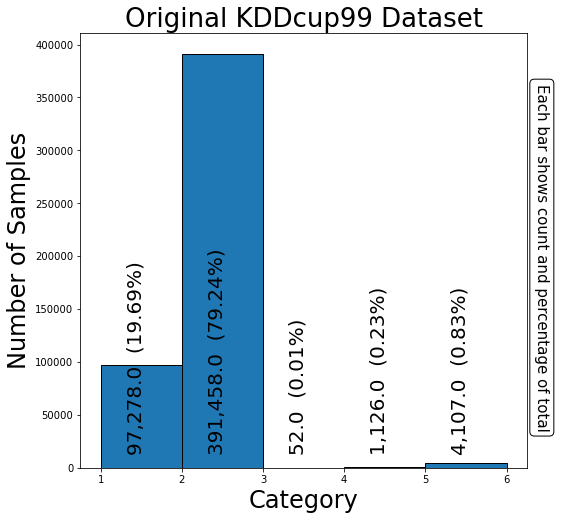

In [13]:
categories = y

from matplotlib.patches import Rectangle

# Plot the Histogram from the random data
fig, ax = plt.subplots(figsize=(8,8))

counts, bins, patches = ax.hist(categories, bins= [1,2,3,4,5,6], edgecolor='black')

# Set the graph title and axes titles
plt.title('Original KDDcup99 Dataset', fontsize=26)
plt.ylabel('Number of Samples', fontsize=24)
plt.xlabel('Category', fontsize=24)
        
# Calculate bar centre to display the count of data points and %
bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
bin_y_centers = ax.get_yticks()[1] * 0.25

# Display the the count of data points and % for each bar in histogram
for i in range(len(bins)-1):
    bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
    plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor', fontsize=20)

# Annotation for bar values
ax.annotate('Each bar shows count and percentage of total',
            xy=(.95,.17), xycoords='figure fraction',
            horizontalalignment='center', verticalalignment='bottom',
            fontsize=15, bbox=dict(boxstyle="round", fc="white"),
            rotation=-90)

# Display the graph
plt.show()

Text(0, 0.5, 'Number of Samples')

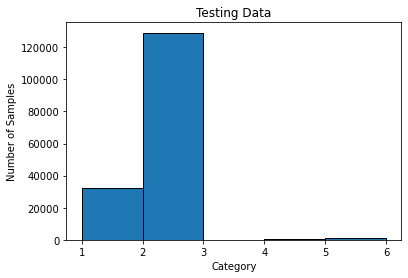

In [9]:
categories2 = y_test
bins = [1,2,3,4,5,6]
plt.hist(categories2, bins = bins, edgecolor = 'black')
plt.title('Testing Data')
plt.xlabel('Category')
plt.ylabel('Number of Samples')

Text(0, 0.5, 'Number of Samples')

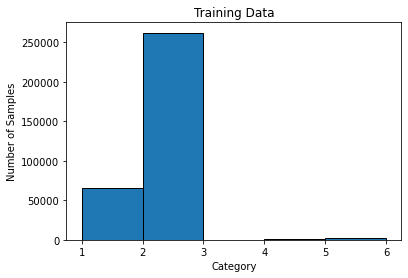

In [10]:
categories3 = y_train
bins = [1,2,3,4,5,6]
plt.hist(categories3, bins = bins, edgecolor = 'black')
plt.title('Training Data')
plt.xlabel('Category')
plt.ylabel('Number of Samples')